# Importing Packages   

<div class="alert alert-block alert-warning">
<b>Make sure to run this cell FIRST! Not doing so may result in pesky errors in the code.</b>
</div>

In [11]:
from datascience import *
import numpy as np
import pandas as pd

import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
%matplotlib inline

# 1. The Data

The main dataset for this notebook was obtained from the [Secretariat of Women and Gender Equality of the Atlantic](https://www.atlantico.gov.co/index.php/gobernacion/secretarias/mujeres-y-equidad), a government institution whose mission statement is to "better the quality of life for all women in the Atlantic Colombian region."  

One of the Secretariat's main functions is to point women to the right resources. As such, the Secretariat receives several cases of violence against women, with many of the cases going beyond domestic violence. Load the cell below to see how these data look. 

In [26]:
cases = Table.read_table("../data/nb4/secretariat-cases.csv")
cases.show(3)

Month/Year,Victim of the conflict?,Municipality,Reason for Consultationtion,Previous complaints?,Violence setting,Type of violence,Referral,Entity referred to
17-Jun,Yes,Soledad,Mistreatment by the governor's bodyguard,Yes,Other,Psychological - Physical,None,None
17-Jun,No,Soledad,Legal advice to make testimony public,Yes,Domestic Violence,All of the above,Psychological - Legal,None
17-Jun,No,Soledad,The former partner fears for her life from her ex-partner,Yes,Domestic Violence,Psychological - Physical,Psychological - Legal,Family Support Commissioner


## 1.1 Understanding the Data  
Throughout the previous notebooks, we have asked you to find the size of some given dataset. That is, we've asked you to find how many rows and columns there are. We've also provided explanations on what each column, and asked you to interpret what each row represents for a given dataset. 

The questions for this section will be largely similar to those presented last week. This is so that you get into the habit of understanding what your dataset represents prior to any analysis.  

In [27]:
cases.show(5)

Month/Year,Victim of the conflict?,Municipality,Reason for Consultationtion,Previous complaints?,Violence setting,Type of violence,Referral,Entity referred to
17-Jun,Yes,Soledad,Mistreatment by the governor's bodyguard,Yes,Other,Psychological - Physical,None,None
17-Jun,No,Soledad,Legal advice to make testimony public,Yes,Domestic Violence,All of the above,Psychological - Legal,None
17-Jun,No,Soledad,The former partner fears for her life from her ex-partner,Yes,Domestic Violence,Psychological - Physical,Psychological - Legal,Family Support Commissioner
17-Jun,Yes,Barranquilla,Victim of Domestic Violence. Psychological Help.,No,Domestic Violence,Psychological - Physical - Sexual,Orientation - Psychological,None
17-Jun,No,Barranquilla,Parents separated.,No,Domestic Violence,Psychological,Orientation - Psychological,None


<div class="alert alert-info">
<b> Question 1.1: </b> Based on the data they contain, what do you think each column represents?
</div> 

*Hint:* Read [the mission statement](https://www.atlantico.gov.co/index.php/secretaria) of the entity that collected these data. 

- Month/Year: ...  
- Victim of the conflict?: ...
- Municipality: ...  
- Reason for Consultation: ... 
- Previous complaints?: ... 
- Violence setting: ...  
- Type of violence: ... 
- Referral: ...  
- Entity referred to: ...

<div class="alert alert-info">
<b> Question 1.2: </b> With these interpretations of our dataset's columns in mind, what do you think each row in our dataset represents?
</div>

*Replace this text with your answer*

<div class="alert alert-info">
    <b> Question 1.3: </b> Using the table properties <code>num_columns</code> and <code>num_rows</code> that we learned in Notebook 1, fill in the code below to print out the size of our dataset. 
</div>

*Hint:* The format of your code should be of the form `dataset.property`

In [4]:
cases_num_rows = ...
cases_num_columns = ...
print(f"Our dataset has {cases_num_rows} cases and {cases_num_columns} properties to describe each case.")

Our dataset has Ellipsis cases and Ellipsis properties to describe each case.


<div class="alert alert-info">
    <b> Question 1.4: </b> Fill in the blanks below with the names of the columns that contain categorical data. If you need more or less space, feel free to add or delete a bullet point. 
</div>

- ...
- ...
- ...

<div class="alert alert-info">
    <b> Question 1.5: </b> Fill in the blanks below with the names of the columns that contain numerical data. 
</div>

- ...

<div class="alert alert-info">
    <b> Question 1.6: </b> What special case of numerical data does this column represent?
</div>

*Replace this text with your answer*

<div class="alert alert-info">
    <b> Question 1.7: </b> Think back to the Colombian National Police family intraviolence dataset we dealt with in Notebook 3. How are that dataset and our current data, <code>cases</code> similar? How are they different? 
</div>

- They are similar in: ... 
- They differ in: ...

## 1.2 Visualizing the Data  

<div class="alert alert-info">
    <b> Question 1.8: </b> Think about the types of data described by our dataset. What visualizations do you think we can generate from these data? Below, delete yes or no depending on whether we can generate the given plot type. 
</div>  

- Histogram? Yes/No  
- Scatter plots? Yes/No  
- Line plots? Yes/No  
- Bar charts? Yes/No

**Tasks to do:**

- Create bar plots for each variable 
- Create interactive widget to select bar plot 
- Create line plot plotting the count of types of violence throughout time (June 2017 - June 2019) 

As you previously stated, our `cases` dataset possesses only one numerical variable in `Month/Year`. You also probably deduced that this is a sequential numerical variable. Because of this, we are limited to bar plots and line plots. Now that we have generated bar plots for most of the categorical variables, we can start looking at how these variables changed throughout time. 

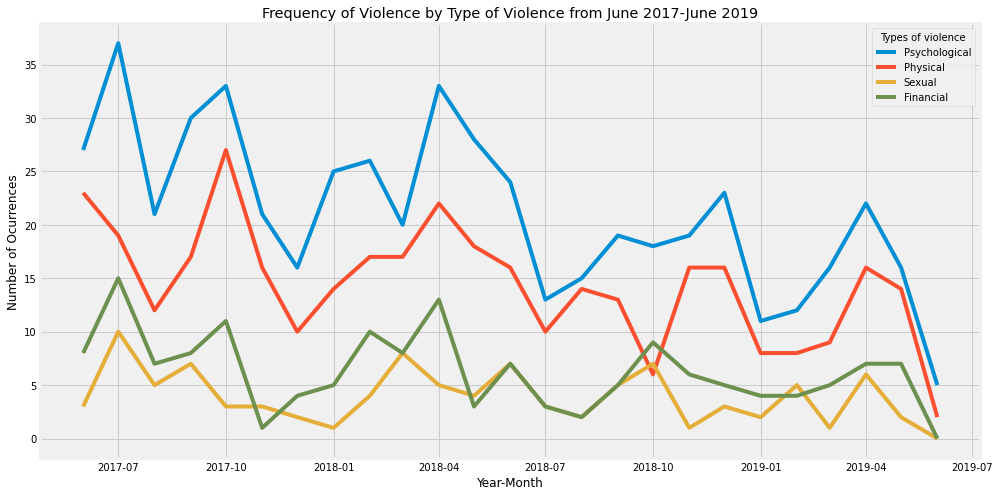

In [18]:
# X axis converted to datetime
cases_df = cases.to_df()
new_time = pd.to_datetime(cases_df["Month/Year"], format="%y-%b")
cases_df["M/Y Datetime"] = new_time

# Extracting types of violence & plotting
def append_col(keyword, df):
    df[f'{keyword} violence claim'] = ""
    arr = []
    for i in df.index:
        if keyword in df['Type of violence'][i]:
            arr.append(1)
        elif 'All of the above' in df['Type of violence'][i]:
            arr.append(1)
        else:
            arr.append(0)
    df[f'{keyword} violence claim'] = arr

append_col("Psychological", cases_df)
append_col("Physical", cases_df)
append_col("Sexual", cases_df)
append_col("Financial", cases_df)

datetime_cases = cases_df.groupby("M/Y Datetime").agg(sum).reset_index()

fig1 = plt.figure(figsize=(15, 8))
ax = fig1.add_subplot(1, 1, 1)
sns.lineplot(data=datetime_cases, x="M/Y Datetime", y="Psychological violence claim", ax=ax, label='Psychological')
sns.lineplot(data=datetime_cases, x="M/Y Datetime", y="Physical violence claim", ax=ax, label='Physical')
sns.lineplot(data=datetime_cases, x="M/Y Datetime", y="Sexual violence claim", ax=ax, label='Sexual')
sns.lineplot(data=datetime_cases, x="M/Y Datetime", y="Financial violence claim", ax=ax, label='Financial')

plt.legend(title="Types of violence")
plt.xlabel("Year-Month")
plt.ylabel("Number of Ocurrences")
plt.title("Frequency of Violence by Type of Violence from June 2017-June 2019");

# 2 Non Sex-disaggregated Data

On Notebook 3, we dealt with data collected from the Colombia National Police database. Recall that this was a sex-disaggregated dataset. Given that ...

**Tasks to do:**
- Look at what cities are described in the current dataset and are in common with the current dataset -> Plot change from 2017 - 2019 for those cities based on count of crimes

In [6]:
family_violence = Table.read_table("../data/nb3/domestic_violence_colombia_police.csv")